In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam

In [ ]:
# ISLAMABAD : 

Saving Islamabad_Updated.csv to Islamabad_Updated (1).csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              183 non-null    datetime64[ns]
 1   Province_State                    183 non-null    object        
 2   Confirmed Cases (n)               183 non-null    int64         
 3   Recovered Cases (n)               183 non-null    int64         
 4   Active Cases (n)                  183 non-null    int64         
 5   Temp (DegC)                       183 non-null    float64       
 6   Wind (Km/Hr)                      183 non-null    float64       
 7   Hum (%)                           183 non-null    float64       
 8   Mask Use (%)                      183 non-null    float64       
 9   Change in Mobility / Soc Dis (%)  183 non-null    float64   

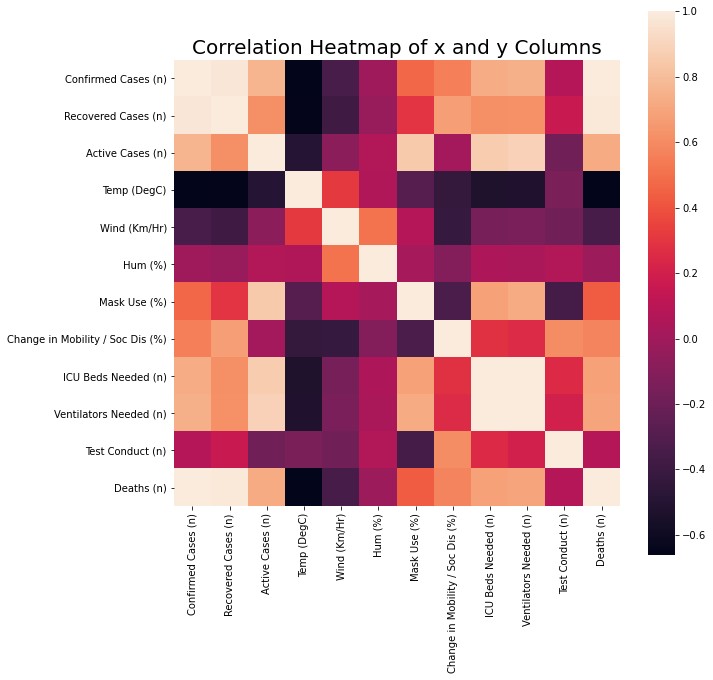

,Confirmed Cases (n),Recovered Cases (n),Active Cases (n),Temp (DegC),Wind (Km/Hr),Hum (%),Mask Use (%),Change in Mobility / Soc Dis (%),ICU Beds Needed (n),Ventilators Needed (n),Test Conduct (n),Deaths (n)
Confirmed Cases (n),1.000000,0.978309,0.764872,-0.660675,-0.337252,-0.008139,0.468139,0.552551,0.728386,0.741069,0.082614,0.997236
Recovered Cases (n),0.978309,1.000000,0.614838,-0.649295,-0.387515,-0.031312,0.298831,0.670844,0.615642,0.621907,0.160166,0.986917
Active Cases (n),0.764872,0.614838,1.000000,-0.496117,-0.079078,0.066238,0.852588,0.017945,0.858993,0.887778,-0.182558,0.727492
Temp (DegC),-0.660675,-0.649295,-0.496117,1.000000,0.315311,0.053169,-0.286177,-0.427721,-0.529994,-0.523093,-0.138297,-0.659912
Wind (Km/Hr),-0.337252,-0.387515,-0.079078,0.315311,1.000000,0.512933,0.073058,-0.421909,-0.158655,-0.147749,-0.184401,-0.346597
Hum (%),-0.008139,-0.031312,0.066238,0.053169,0.512933,1.000000,0.023719,-0.106163,0.050492,0.045761,0.069199,-0.012279
Mask Use (%),0.468139,0.298831,0.852588,-0.286177,0.073058,0.023719,1.000000,-0.330577,0.688619,0.721565,-0.359286,0.434724
Change in Mobility / Soc Dis (%),0.552551,0.670844,0.017945,-0.427721,-0.421909,-0.106163,-0.330577,1.000000,0.285907,0.254222,0.608343,0.572278
ICU Beds Needed (n),0.728386,0.615642,0.858993,-0.529994,-0.158655,0.050492,0.688619,0.285907,1.000000,0.996650,0.249360,0.688213
Ventilators Needed (n),0.741069,0.621907,0.887778,-0.523093,-0.147749,0.045761,0.721565,0.254222,0.996650,1.000000,0.203673,0.700026


In [ ]:
# preparing data

from google.colab import files
uploaded = files.upload()
df_isl = pd.read_csv(list(uploaded.keys())[0], parse_dates=['Date'])

print('\n')
print(df_isl.info());
print('\n')
print(df_isl.describe())

dff = df_isl.corr()

fig1 = plt.figure(figsize = (10,10));
plt.title('Correlation Heatmap of x and y Columns', fontsize=20);
sb.heatmap(dff, square = True);
plt.show();

dff

In [ ]:
# data pre processing 

x = df_isl.iloc[:, 2:-1]
y = df_isl.iloc[:, -1] 

x = x.drop(['Hum (%)','Test Conduct (n)'], axis = 1)

print('x data shape : ' , x.shape)
print('y data shape : ' , y.shape)
print('\n')

# xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.1, random_state=1)

tr_sz = int(0.8*len(y))
xtr = x.iloc[0:tr_sz , :]
ytr = y[0:tr_sz]
xts = x.iloc[tr_sz: , :]
yts = y[tr_sz:]

print('x-train data shape : ' , xtr.shape)
print('x-test data shape : ' , xts.shape)
print('y-train data shape : ' , ytr.shape)
print('y-test data shape : ' , yts.shape)

x data shape :  (183, 9)
y data shape :  (183,)


x-train data shape :  (146, 9)
x-test data shape :  (37, 9)
y-train data shape :  (146,)
y-test data shape :  (37,)


In [ ]:
# solving via conventional machine learning model : 

reg = LinearRegression() 
reg.fit(xtr , ytr) 

print('\n Actual-y  : \n' , yts.values)

ypr = reg.predict(xts); # y_predicted 
print('\n Predicted-y using lin reg: \n' , np.round(ypr,2))

ytss = np.array(yts); 
res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ytss[i]-ypr[i])/ytss[i])
err = np.sum(res)/len(yts)
print('\nAccuracy obt from lin reg model : ', (1-np.round(err,2))*100,' %')


 Actual-y  : 
 [291 297 305 307 309 314 318 324 329 332 334 340 341 341 345 348 353 358
 368 371 377 379 381 385 388 389 391 393 394 398 402 404 404 407 412 415
 416]

 Predicted-y using lin reg: 
 [288.39 293.64 298.14 301.5  304.48 308.3  311.61 315.68 319.96 324.73
 328.27 333.32 336.65 339.17 342.81 346.17 350.08 354.05 358.97 362.29
 365.84 367.92 371.01 374.49 377.37 379.81 381.66 383.82 385.06 387.52
 389.32 390.86 392.28 394.21 396.4  399.03 401.39]

Accuracy obt from lin reg model :  98.0  %


In [ ]:
# # solving via deep nueral network :  

model = Sequential()

model.add(Dense(128, kernel_initializer='normal',input_shape=(x.shape[1],), activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='normal',activation='linear', name='output'))

# optimizer = Adam(lr=0.01)
# optimizer = RMSprop(lr=0.01)
# optimizer = SGD(lr=0.01)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
print(model.summary())

model.fit(xtr, ytr, batch_size=5, epochs=250)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
output (Dense)               (None, 1)                 257       
Total params: 34,561
Trainable params: 34,561
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
30/30 [==============================] - 0s 2ms/step - loss: 94.3309 - mean_squared_error: 13246.0133
Epoch 2/250
30/30 [==============================] - 0s 1ms/step - loss: 32.7834 - mean_squared_error: 1456.2535
Epoch 3/250
30/30 [==============================] - 0s 2ms/step - loss: 10.3042 - mean_squared_error: 170.9852
Epoch 4/250
30/30 [=================

In [ ]:
ypred = model.predict(xts)

ya_isl = np.array(yts)
yp_isl = np.array(ypred)

print('\nya_isl ~vs~ yp_isl')
for i in range(len(yts)): 
  print(ya_isl[[i]],'vs',yp_isl[i]) 

res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ya_isl[i]-yp_isl[i])/ya_isl[i])

err_isl = np.sum(res)/len(yts)
print('\nAccuracy obt from deep nueral network : ', (1-np.round(err_isl,2))*100,' %')


ya_isl ~vs~ yp_isl
[291] vs [295.31772]
[297] vs [301.0004]
[305] vs [305.23956]
[307] vs [309.71573]
[309] vs [314.18]
[314] vs [318.31967]
[318] vs [322.5497]
[324] vs [327.01993]
[329] vs [332.12778]
[332] vs [337.83298]
[334] vs [342.40042]
[340] vs [347.5956]
[341] vs [351.34695]
[341] vs [354.1809]
[345] vs [357.5215]
[348] vs [360.54767]
[353] vs [364.02478]
[358] vs [367.89774]
[368] vs [371.86752]
[371] vs [375.20096]
[377] vs [378.0447]
[379] vs [380.45474]
[381] vs [384.07538]
[385] vs [387.79257]
[388] vs [390.9852]
[389] vs [394.42996]
[391] vs [396.76416]
[393] vs [400.0717]
[394] vs [402.4033]
[398] vs [405.19437]
[402] vs [407.18707]
[404] vs [408.98044]
[404] vs [410.77695]
[407] vs [413.06253]
[412] vs [415.4927]
[415] vs [419.5589]
[416] vs [423.60388]

Accuracy obt from deep nueral network :  98.0  %


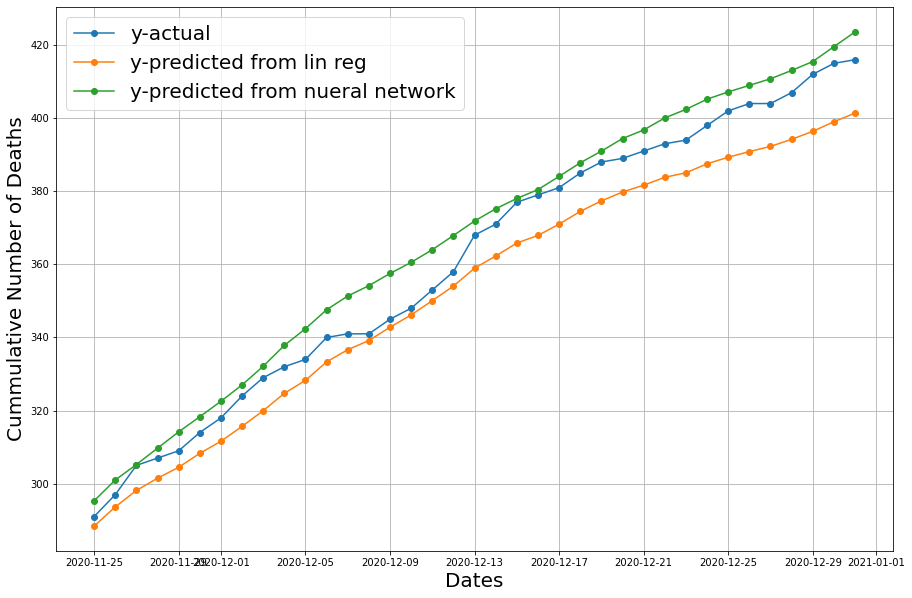

In [ ]:
dts = df_isl['Date']
end_dts = dts[tr_sz:]

fig2 = plt.figure(figsize = (15,10))
plt.plot(end_dts , ya_isl, '-o',label='y-actual');
plt.plot(end_dts , ypr, '-o',label='y-predicted from lin reg');
plt.plot(end_dts , yp_isl, '-o',label='y-predicted from nueral network');
plt.grid(); plt.legend(prop={'size': 20});
plt.xlabel('Dates',fontsize=20); 
plt.ylabel('Cummulative Number of Deaths',fontsize=20); 